## Import packages

In [122]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
sns.set()
sns.set_context('talk')

In [123]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        l = str(json.loads(l))
        yield eval(l)

## Import dataset

In [124]:
data_modcloth = []
for l in parse("modcloth_final_data.json.gz"):
    data_modcloth.append(l)

In [125]:
data_modcloth[0]

{'item_id': '123373',
 'waist': '29',
 'size': 7,
 'quality': 5,
 'cup size': 'd',
 'hips': '38',
 'bra size': '34',
 'category': 'new',
 'bust': '36',
 'height': '5ft 6in',
 'user_name': 'Emily',
 'length': 'just right',
 'fit': 'small',
 'user_id': '991571'}

In [126]:
data_renttherunway = []
for l in parse("renttherunway_final_data.json.gz"):
    data_renttherunway.append(l)

In [127]:
data_renttherunway[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

In [128]:
len(data_renttherunway)

192544

## Data Clean

In [129]:
df = pd.DataFrame(data_renttherunway)

In [130]:
def standardize_height(str_in):
    if type(str_in) == float:
        return str_in
    str_in = str_in.strip()
    if '\'' in str_in:
        str_in = str_in.replace('\'', '')
    if '"' in str_in:
        str_in = str_in.replace('"', '')

    foot,inch = str_in.strip().split(' ')
    output = int(foot) * 12 + int(inch)

    return output

In [131]:
def standardize_weight(str_in):
    if type(str_in) == float:
        return str_in
    if 'lbs' in str_in:
        str_in = str_in.replace('lbs', '')
    if(str_in.isnumeric()):
        return int(str_in)

    return str_in

In [132]:
df['height'] = df['height'].apply(lambda x: standardize_height(x))
df['weight'] = df['weight'].apply(lambda x: standardize_weight(x))
df['fit'] = df['fit'].apply(lambda x: x == 'fit')
df['review_date'] = df['review_date'].apply(lambda x: datetime.strptime(df['review_date'][0], '%B %d, %Y'))

In [133]:
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,True,420272,34d,2260466,137.0,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28,2016-04-20
1,True,273551,34b,153475,132.0,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36,2016-04-20
2,True,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116,2016-04-20
3,True,909926,34c,126335,135.0,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34,2016-04-20
4,True,151944,34b,616682,145.0,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27,2016-04-20


Clean/EDA Heights

In [108]:
original_heights = [d['height'] for d in data_renttherunway if d.get('height') != None]
heights = [standardize_height(h) for h in original_heights]

In [109]:
len(heights), np.mean(heights), np.median(heights)

(191867, 65.31062142004617, 65.0)

In [110]:
np.unique(heights)

array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 78])

Text(0.5, 0, 'height (inch)')

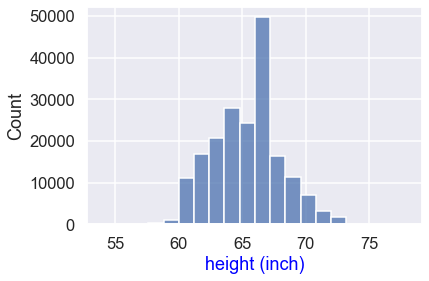

In [111]:
sns.histplot(data=heights, bins=20)
plt.xlabel('height (inch)', color='blue')

In [112]:
heights = []
for d in data_renttherunway:

    if d.get('height') != None:
        d['height'] = standardize_height(d['height'])
        heights.append(d['height'])
    else:
        data_renttherunway.remove(d)

In [116]:
c=0
for d in data_renttherunway:
    a = d.get('height')
#     if a == None:
    if type(a) == str:
#         print(d)
        c+=1
c

673

In [18]:
# [d.get('height') for d in data_renttherunway]

Clean/EDA Weights

In [19]:
len([d.get('weight') for d in data_renttherunway])

191869

In [21]:
original_weights = [d['weight'] for d in data_renttherunway if d.get('weight') != None]
weights = [standardize_weight(h) for h in original_weights]

In [22]:
len(weights), np.mean(weights), np.median(weights)

(162119, 137.39227357681702, 135.0)

In [23]:
len(np.unique(weights))

190

Text(0.5, 0, 'weight (lbs)')

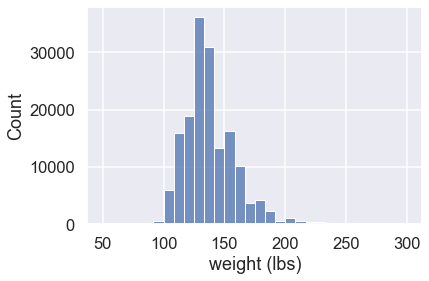

In [24]:
sns.histplot(data=weights, bins=30)
plt.xlabel('weight (lbs)')

In [25]:
weights = []
for d in data_renttherunway:

    if d.get('weight') != None:
        d['weight'] = standardize_weight(d['weight'])
        weights.append(d['weight'])
    else:
        data_renttherunway.remove(d)

In [26]:
len(data_renttherunway)

166104

In [27]:
# [d.get('weight') for d in data_renttherunway]

In [28]:
data_renttherunway[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': 137,
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': 68,
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

Clean/EDA category data

In [29]:
rentedFor = []
for d in data_renttherunway:
    if d.get('rented for') not in rentedFor:
        rentedFor.append(d.get('rented for'))

In [30]:
rentedFor

['vacation',
 'other',
 'formal affair',
 'wedding',
 'date',
 'everyday',
 'party',
 'work',
 None,
 'party: cocktail']

In [31]:
bodyType = []
for d in data_renttherunway:
    if d.get('body type') not in bodyType:
        bodyType.append(d.get('body type'))

In [32]:
bodyType

['hourglass',
 'straight & narrow',
 'pear',
 'athletic',
 'full bust',
 'petite',
 'apple',
 None]

In [33]:
category = []
for d in data_renttherunway:
    if d.get('category') not in category:
        category.append(d.get('category'))

In [34]:
category

['romper',
 'gown',
 'dress',
 'sheath',
 'leggings',
 'sweater',
 'jacket',
 'shirtdress',
 'jumpsuit',
 'maxi',
 'shift',
 'top',
 'shirt',
 'mini',
 'skirt',
 'pullover',
 'pants',
 'suit',
 'coat',
 'blouse',
 'trench',
 'cape',
 'bomber',
 'blazer',
 'vest',
 'duster',
 'ballgown',
 'tank',
 'poncho',
 'frock',
 'tunic',
 'cardigan',
 'culottes',
 'down',
 'midi',
 'legging',
 'print',
 'pant',
 'knit',
 'culotte',
 'sweatshirt',
 'peacoat',
 'trouser',
 'kaftan',
 'overalls',
 'jogger',
 'tee',
 'combo',
 'henley',
 'blouson',
 'turtleneck',
 'trousers',
 'overcoat',
 'hoodie',
 't-shirt',
 'caftan',
 'tight',
 'kimono',
 'cami',
 'for',
 'crewneck',
 'skirts',
 'parka',
 'buttondown',
 'skort',
 'sweatershirt',
 'jeans',
 'sweatpants']